<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/efficientnetb3_gan_progress11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [5]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.5-py3-none-any.whl size=111932 sha256=942885191072d1656a8500d657cd8e5b9dde5611b2c6898497c12716efe42fc2
  Stored in directory: /root/.cache/pip/wheels/09/0f/ab/77c3f5de4d162a047d4ac3e9a8ced7252d17ac1f9f2a42fa08
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [10]:
!kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          12323        286  1.0              
nelgiriyewithana/emotions                                  Emotions                                           16MB  2024-02-05 16:01:39            862         54  1.0              
kanchana1990/2024-amazon-best-sellers-top-valentine-gifts  2024 Amazon Best Sellers: Top Valentine Gifts 🎯💘   25KB  2024-02-06 18:49:26            764         33  1.0              
shiivvvaam/top-youtuber-worldwide                          Top YouTubers Worldwide             

In [11]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

 47% 5.00M/10.6M [00:00<00:00, 47.4MB/s]
100% 10.6M/10.6M [00:00<00:00, 85.9MB/s]


In [12]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [13]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

#Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

**Load** **Dataset**

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 128
BATCH_SIZE = 32
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [15]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
print(len(dataset))

15


In [18]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(32, 128, 128, 3)
[3 2 6 4 6 4 2 1 6 0 1 4 3 0 3 5 0 1 0 4 0 4 4 5 2 3 6 6 2 1 0 3]
(128, 128, 3)


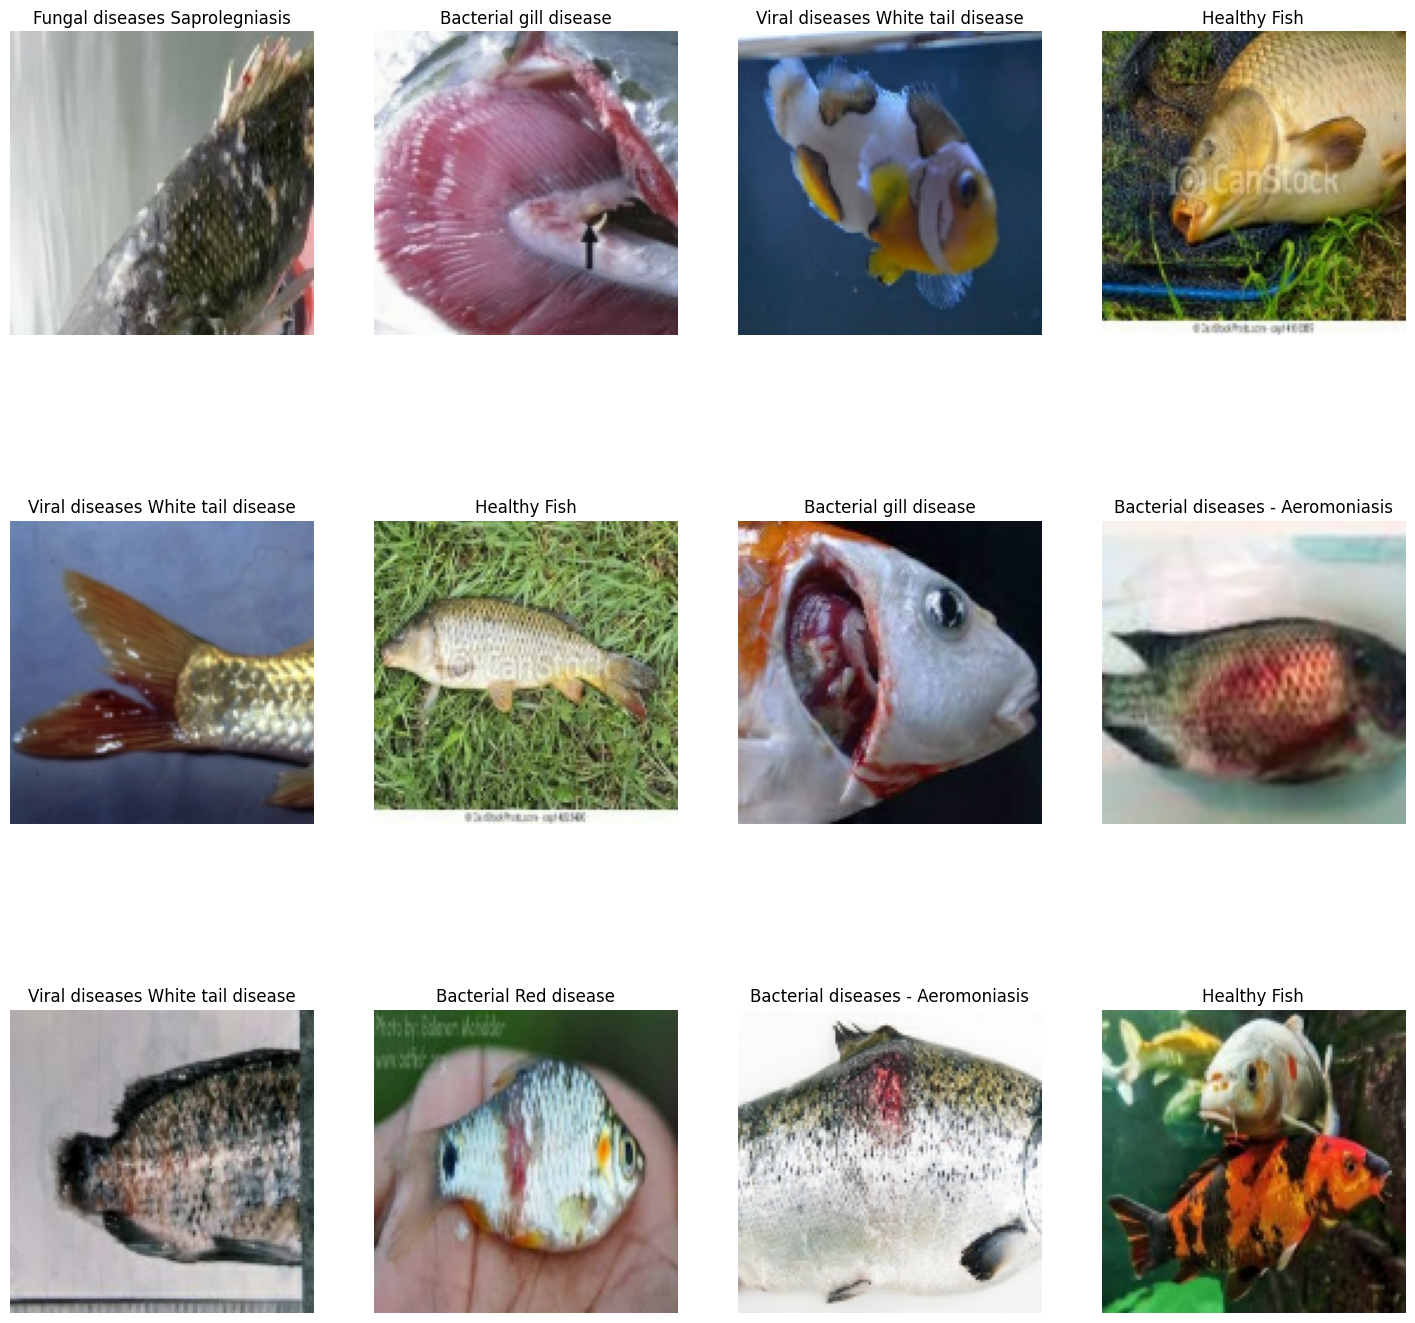

In [19]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [20]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

10.5

**GAN Model**

In [36]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import time
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [37]:
IMG_H = 128
IMG_W = 128
IMG_C = 3

In [38]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [40]:
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_png(img)
    img = tf.io.decode_jpg(img)
    img = tf.io.decode_jpeg(img)
    img = tf.image.resize(img, [IMG_H, IMG_W])
    img = tf.cast(img, tf.float32)
    img = (img - 127.5) / 127.5
    return img, label

In [41]:
def tf_dataset(images_path, images_label, batch_size):
    ds = tf.data.Dataset.from_tensor_slices((images_path, images_label))
    ds = ds.shuffle(buffer_size=1000).map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

In [42]:
def build_generator(latent_dim, embed_dim, num_classes):
    noise = L.Input((latent_dim), name="noise_input")
    x = L.Dense(256)(noise)
    x = L.LeakyReLU(0.2)(x)

    label = L.Input((1), name="class_label")
    l = L.Embedding(num_classes, embed_dim)(label)
    l = L.Flatten()(l)

    x = L.Concatenate()([x, l])

    x = L.Dense(512)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(1024)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(4096)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Dense(IMG_H * IMG_W * IMG_C)(x)
    x = L.LeakyReLU(0.2)(x)

    x = L.Reshape((IMG_H, IMG_W, IMG_C))(x)
    fake_output = L.Activation("tanh")(x)

    return Model([noise, label], fake_output, name="generator")

In [44]:
def build_discriminator(embed_dim, num_classes):
    image = L.Input((IMG_H, IMG_W, IMG_C), name="disc_input")
    x = L.Flatten()(image)
    x = L.Dense(4096)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    label = L.Input((1), name="class_label")
    l = L.Embedding(num_classes, embed_dim)(label)
    l = L.Flatten()(l)

    x = L.Concatenate()([x, l])

    x = L.Dense(1024)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(256)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(128)(x)
    x = L.LeakyReLU(0.2)(x)
    x = L.Dropout(0.3)(x)

    x = L.Dense(1)(x)

    return Model([image, label], x, name="discriminator")

In [45]:
@tf.function
def train_step(real_images, real_labels, latent_dim, num_classes, generator, discriminator, g_opt, d_opt):
    batch_size = tf.shape(real_images)[0]
    bce_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1)

    ## Discriminator
    noise = tf.random.normal([batch_size, latent_dim])

    for _ in range(3):
        with tf.GradientTape() as dtape:
            generated_images = generator([noise, real_labels], training=True)

            real_output = discriminator([real_images, real_labels], training=True)
            fake_output = discriminator([generated_images, real_labels], training=True)

            d_real_loss = bce_loss(tf.ones_like(real_output), real_output)
            d_fake_loss = bce_loss(tf.zeros_like(fake_output), fake_output)
            d_loss = d_real_loss + d_fake_loss

            d_grad = dtape.gradient(d_loss, discriminator.trainable_variables)
            d_opt.apply_gradients(zip(d_grad, discriminator.trainable_variables))

    with tf.GradientTape() as gtape:
        generated_images = generator([noise, real_labels], training=True)

        fake_output = discriminator([generated_images, real_labels], training=True)

        g_loss = bce_loss(tf.ones_like(fake_output), fake_output)

        g_grad = gtape.gradient(g_loss, generator.trainable_variables)
        g_opt.apply_gradients(zip(g_grad, generator.trainable_variables))

    return d_loss, g_loss

In [46]:
def save_plot(examples, epoch, n):
    n = int(n)
    examples = (examples + 1) / 2.0
    examples = examples * 255
    file_name = f"samples/generated_plot_epoch-{epoch+1}.png"

    cat_image = None
    for i in range(n):
        start_idx = i*n
        end_idx = (i+1)*n

        image_list = examples[start_idx:end_idx]
        if i == 0:
            cat_image = np.concatenate(image_list, axis=1)
        else:
            tmp = np.concatenate(image_list, axis=1)
            cat_image = np.concatenate([cat_image, tmp], axis=0)

    cv2.imwrite(file_name, cat_image)

In [61]:
!pip install tensorflow-io
!pip install --upgrade tensorflow
from glob import glob
import tensorflow as tf
import tensorflow_io as tfio

if __name__ == "__main__":
    """ Hyperparameters """
    batch_size = 32
    latent_dim = 128
    embed_dim = 128
    num_classes = 7
    num_epochs = 100
    n_samples = 3*3
    path = "/content/SB-FishDisease/SB-FishDisease"

    images_path = glob(f"{path}/*/*.png") + glob(f"{path}/*/*.jpg") + glob(f"{path}/*/*.jpeg")
    labels_list = os.listdir(f"{path}")
    print(f"Number of labels: {len(labels_list)}")
    print(f"Labels: {labels_list}")
    images_label = []
    for path in images_path:
        name = path.split("/")[-2]
        index = labels_list.index(name)
        images_label.append(index)
    print(f"Images: {len(images_path)} - Labels: {len(images_label)}")
    create_dir("samples")
    create_dir("saved_model")
    g_model = build_generator(latent_dim, embed_dim, num_classes)
    d_model = build_discriminator(embed_dim, num_classes)

    g_model.summary()
    d_model.summary()

    #Training
    d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

    images_dataset = tf_dataset(images_path, images_label, batch_size)
    seed = np.random.normal(size=(n_samples, latent_dim))

    seed_class_label = [0, 1, 2]
    seed_label = []
    for item in seed_class_label:
        seed_label += [item] * int(np.sqrt(n_samples))

    seed_label = np.array(seed_label)

    for epoch in range(num_epochs):
        start = time.time()

        d_loss = 0.0
        g_loss = 0.0
        for image_batch, label_batch in images_dataset:
            d_batch_loss, g_batch_loss = train_step(image_batch, label_batch, latent_dim, num_classes, g_model, d_model, g_optimizer, d_optimizer)
            d_loss += d_batch_loss
            g_loss += g_batch_loss

        d_loss = d_loss/len(images_dataset)
        g_loss = g_loss/len(images_dataset)

        g_model.save("saved_model/g_model.h5")
        d_model.save("saved_model/d_model.h5")

        examples = g_model.predict([seed, seed_label], verbose=0)
        save_plot(examples, epoch, np.sqrt(n_samples))

        time_taken = time.time() - start
        print(f"[{epoch+1:1.0f}/{num_epochs}] {time_taken:2.2f}s - d_loss: {d_loss:1.4f} - g_loss: {g_loss:1.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 856.5 kB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


Number of labels: 7
Labels: ['Bacterial Red disease', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Viral diseases White tail disease', 'Parasitic diseases']
Images: 457 - Labels: 457
Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 noise_input (InputLayer)    [(None, 128)]                0         []                            
                                                                                                  
 class_label (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 dense_37 (Dense)            (None, 256)                  33024     ['noise_input[0][0]']         
                                    

AttributeError: in user code:

    File "<ipython-input-40-d400733fb984>", line 4, in load_image  *
        img = tf.io.decode_jpg(img)

    AttributeError: module 'tensorflow._api.v2.io' has no attribute 'decode_jpg'


In [58]:
    d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

    images_dataset = tf_dataset(images_path, images_label, batch_size)
    seed = np.random.normal(size=(n_samples, latent_dim))

    seed_class_label = [0, 1, 2]
    seed_label = []
    for item in seed_class_label:
        seed_label += [item] * int(np.sqrt(n_samples))

    seed_label = np.array(seed_label)

    for epoch in range(num_epochs):
        start = time.time()

        d_loss = 0.0
        g_loss = 0.0
        for image_batch, label_batch in images_dataset:
            d_batch_loss, g_batch_loss = train_step(image_batch, label_batch, latent_dim, num_classes, g_model, d_model, g_optimizer, d_optimizer)
            d_loss += d_batch_loss
            g_loss += g_batch_loss

        d_loss = d_loss/len(images_dataset)
        g_loss = g_loss/len(images_dataset)

        g_model.save("saved_model/g_model.h5")
        d_model.save("saved_model/d_model.h5")

        examples = g_model.predict([seed, seed_label], verbose=0)
        save_plot(examples, epoch, np.sqrt(n_samples))

        time_taken = time.time() - start
        print(f"[{epoch+1:1.0f}/{num_epochs}] {time_taken:2.2f}s - d_loss: {d_loss:1.4f} - g_loss: {g_loss:1.4f}")

AttributeError: in user code:

    File "<ipython-input-40-d400733fb984>", line 4, in load_image  *
        img = tf.io.decode_jpg(img)

    AttributeError: module 'tensorflow._api.v2.io' has no attribute 'decode_jpg'


In [27]:
import numpy as np
import tensorflow as tf
import math

def load_custom_data(directory):
    images = []
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE
    )
    plt.figure(figsize=(18, 18))
    for image_batch, label_batch in dataset.take(math.ceil(len(dataset) / BATCH_SIZE)):
        for i in range(BATCH_SIZE):
            images.append(image_batch[i].numpy().astype("float32"))
    images = np.asarray(images)  # Convert list to numpy array
    images = (images - 127.5) / 127.5  # Normalize the images
    return images


In [28]:
def generate_real_samples(dataset, n_samples):
	# choose random images
	ix = randint(0, dataset.shape[0], n_samples)
	# select the random images and assign it to X
	X = dataset[ix]
	# generate class labels and assign to y
	y = ones((n_samples, 1)) ##Label=1 indicating they are real
	return X, y

In [29]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [30]:
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict using generator to generate fake samples.
	X = generator.predict(x_input)
	# Class labels will be 0 as these samples are fake.
	y = zeros((n_samples, 1))  #Label=0 indicating they are fake
	return X, y

In [31]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			d_loss_real, _ = d_model.train_on_batch(X_real, y_real)

			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)

			X_gan = generate_latent_points(latent_dim, n_batch)

			y_gan = ones((n_batch, 1))

			g_loss = gan_model.train_on_batch(X_gan, y_gan)

			print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss_real, d_loss_fake, g_loss))

	g_model.save('generator_2epochs.h5')

In [32]:

latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_custom_data('/content/SB-FishDisease/SB-FishDisease')
#dataset = load_real_samples()
print(len(dataset))
import numpy as np
# Assuming 'dataset' is a list of images
#dataset = np.array(dataset)
print(len(dataset))

# train model
train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2)

Found 457 files belonging to 7 classes.


32
32


<Figure size 1800x1800 with 0 Axes>

In [33]:
from keras.models import load_model
from numpy.random import randn

In [34]:
# load model
g_model = load_model('generator_2epochs.h5') #Model trained for 100 epochs
# generate images
latent_points = generate_latent_points(100, 25)  #Latent dim and n_samples
# generate images
X = g_model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

1/1 [==============================] - 15s 15s/step


NameError: name 'show_plot' is not defined

In [ ]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

In [ ]:
train_ds=dataset.take(int(len(dataset)*train_size))
len(train_ds)

In [ ]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)

In [ ]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

In [ ]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,input_shape = input_shape, pooling= 'max')
model = models.Sequential([base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(128, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
    bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.2 , seed = 75),
    Dense(num_classes , activation = 'softmax')
])



model.build(input_shape=input_shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

In [ ]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
    plt.axis("off")

In [ ]:
model_version=1
model.save(f"../models/{model_version}")

In [ ]:
classes

In [ ]:
def classification_report_gen(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = classes[np.argmax(predictions)]
  return predicted_class, predictions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

y_pred = []
y_true = []

for images, labels in test_ds:
  for image, label in zip(images, labels):
    image = image.numpy()
    predicted_class, _ = classification_report_gen(model, image)
    y_pred.append(predicted_class)
    y_true.append(classes[label])

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sn.heatmap(cm,cmap='Blues', annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
accuracy = np.trace(cm) / float(np.sum(cm))
print("Accuracy:", accuracy)